# Analyzing Data

In [1]:
import pycountry
import pandas as pd

# Suppressing Unusal warnings
import warnings
warnings.simplefilter("ignore")

def read_and_process_gdp_growth_data(filename):
    """
    This function reads and processes the GDP growth data from the World Bank.

    Args:
        filename: The path to the CSV file containing the GDP growth data.

    Returns:
        A tuple of two dataframes: one with the country names as columns and the other with the years as columns.
    """

    # Read the CSV file into a Pandas DataFrame.
    df = pd.read_csv(filename, skiprows=4)

    # Drop the unnecessary columns.
    df = df.drop(['Indicator Name', 'Indicator Code', 'Country Code', 'Unnamed: 67', "1960", "2022"], axis=1)

    # Replace nulls with 0.
    df = df.fillna(0)
    
    # Filter the DataFrame to only include countries.
    countries = [country.name for country in list(pycountry.countries)]
    df = df[df["Country Name"].isin(countries)]

    # Convert the DataFrame to two dataframes: one with the country names as columns and the other with the years as columns.
    years_df = df
    countries_df = df.set_index("Country Name").T

    return countries_df, years_df

In [2]:
# Read the dataset
filename = 'API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5454826.csv'
countries_df, years_df = read_and_process_gdp_growth_data(filename)

m

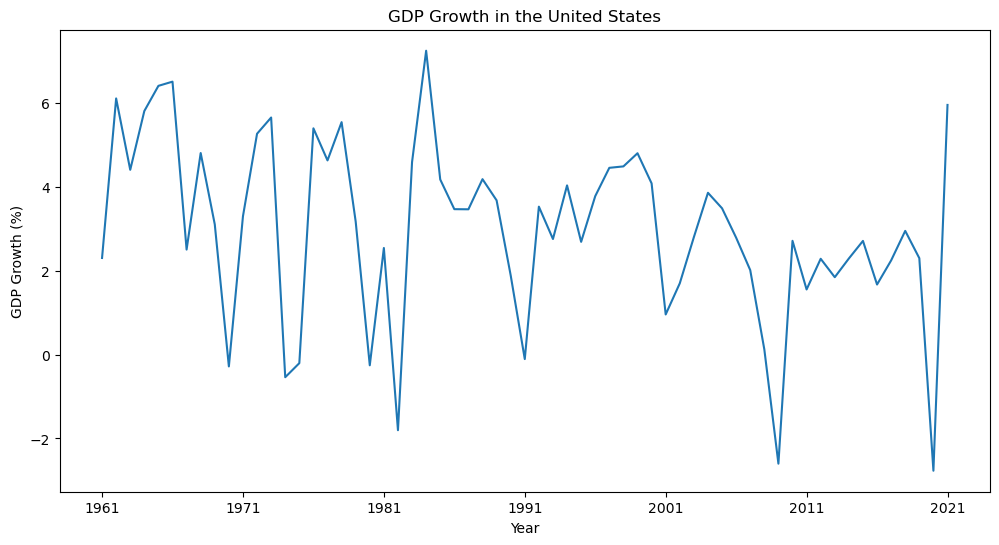

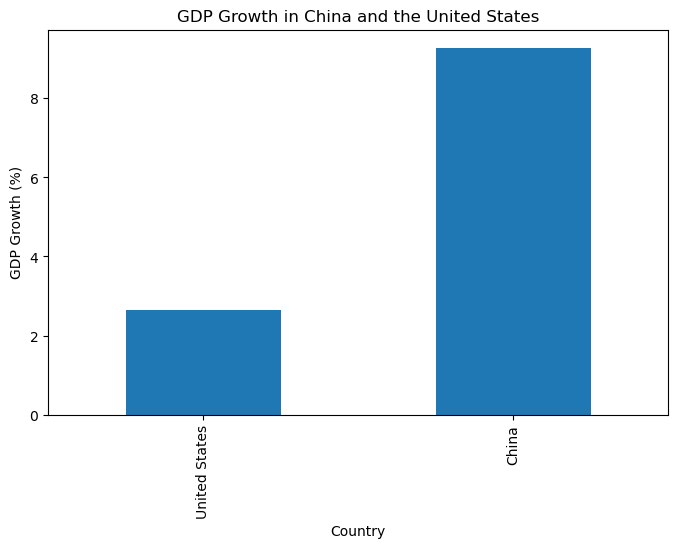

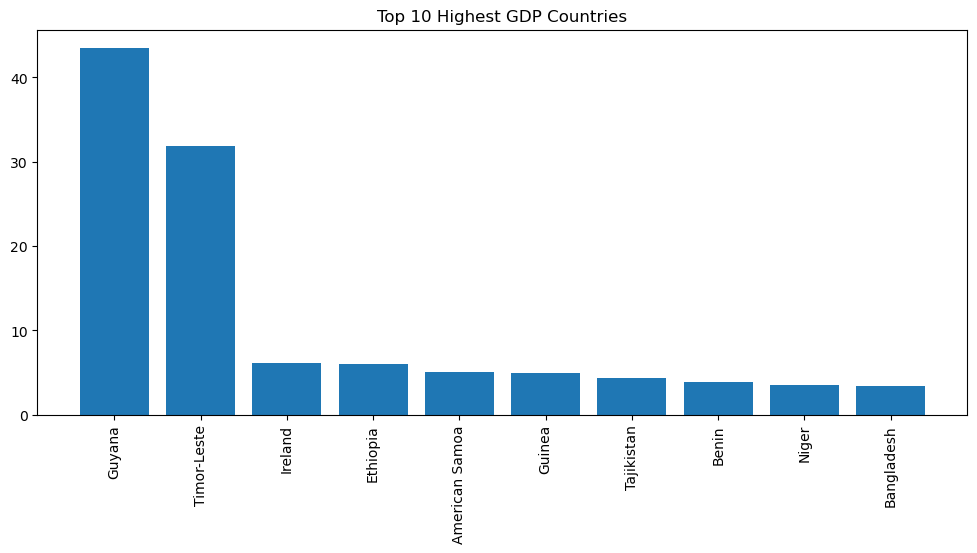

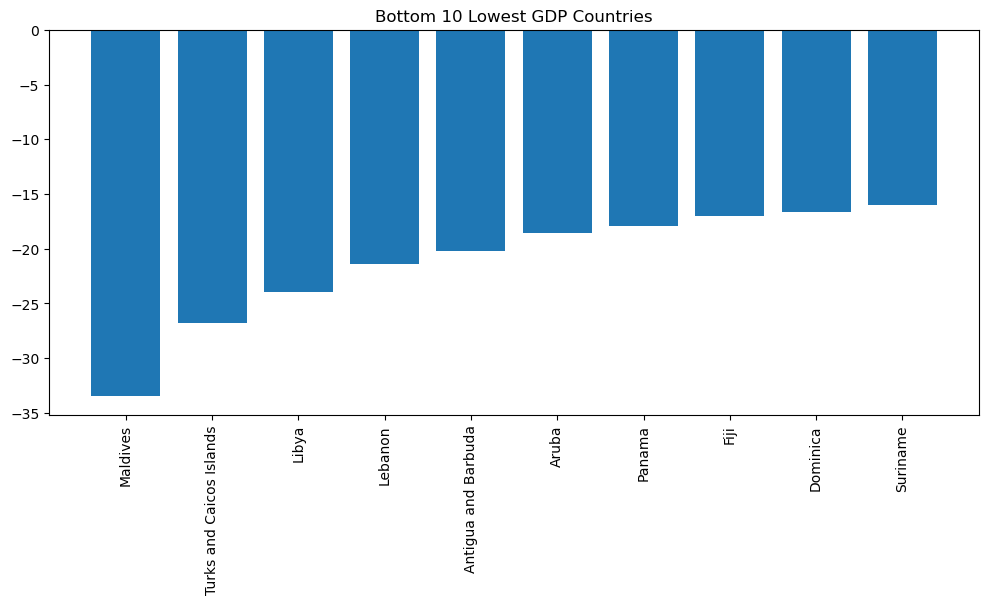

In [3]:
import matplotlib.pyplot as plt

# Create a line chart for the United States.
plt.figure(figsize=(12, 6))
countries_df["United States"].plot(kind="line")
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth in the United States')
plt.show()

# Create a bar chart comparing GDP growth between China and the United States.
countries_df[["United States", "China"]].iloc[20:].mean().plot(kind="bar", figsize=(8, 5))
plt.xlabel('Country')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth in China and the United States')
plt.show()

# Get the top 10 highest GDP countries.
top_10_gdp_countries = years_df.nlargest(10, '2020')

# Get the bottom 10 lowest GDP countries.
bottom_10_gdp_countries = years_df.nsmallest(10, '2020')

# Create a bar chart for the top 10 highest GDP countries.
plt.figure(figsize=(12, 5))
plt.bar(height=top_10_gdp_countries['2020'].values, x=top_10_gdp_countries['Country Name'])
plt.title('Top 10 Highest GDP Countries')
plt.xticks(rotation=90)
plt.show()

# Create a bar chart for the bottom 10 lowest GDP countries.
plt.figure(figsize=(12, 5))
plt.bar(height=bottom_10_gdp_countries['2020'].values, x=bottom_10_gdp_countries['Country Name'])
plt.title('Bottom 10 Lowest GDP Countries')
plt.xticks(rotation=90)
plt.show()

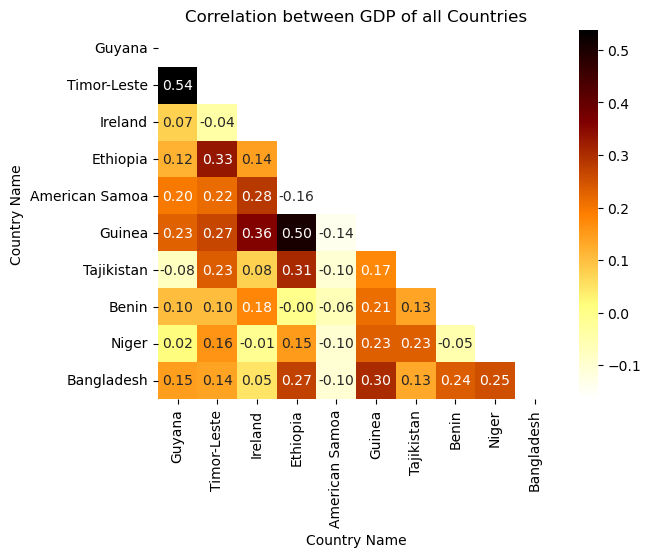

In [4]:
import numpy as np
import seaborn as sns

corr = top_10_gdp_countries.set_index("Country Name").T.corr()
labels = corr.columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='afmhot_r', annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.title('Correlation between GDP of all Countries')
plt.show()

In [17]:
top_10_countries

,Country Name,Mean Before 1990,Mean After 1990
Country Name,,,
Equatorial Guinea,Equatorial Guinea,0.955525,17.314406
China,China,6.849677,9.285176
Myanmar,Myanmar,2.981996,8.480857
Bosnia and Herzegovina,Bosnia and Herzegovina,0.000000,7.824426
Ethiopia,Ethiopia,0.718289,6.958732
Mozambique,Mozambique,0.166667,6.391285
Uganda,Uganda,0.918288,6.336329
Iraq,Iraq,6.330331,6.225068
Cabo Verde,Cabo Verde,1.759673,6.166627


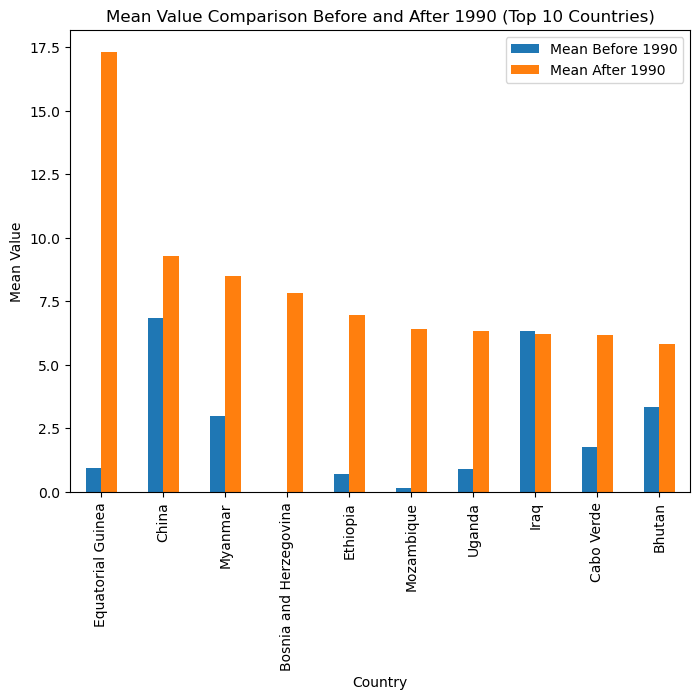

In [5]:
# Group the data by country and calculate the mean for the two periods
grouped_data = years_df.groupby('Country Name').mean()
mean_1961_1990 = grouped_data.iloc[:, 0:30].mean(axis=1)
mean_1991_2020 = grouped_data.iloc[:, 30:60].mean(axis=1)

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Country Name': grouped_data.index, 
                          'Mean Before 1990': mean_1961_1990,
                          'Mean After 1990': mean_1991_2020})

# Sort the data by the mean after 1990 in descending order and select the top 10 countries
top_10_countries = plot_data.sort_values('Mean After 1990', ascending=False).head(10)

# Create the bar plots
top_10_countries.plot(kind="bar", figsize=(8, 6))

# Add labels and title
plt.ylabel('Mean Value')
plt.xlabel('Country')
plt.title('Mean Value Comparison Before and After 1990 (Top 10 Countries)')

# Show the legend and plot
plt.legend()
plt.show()

# Clustering

In [6]:
# Normalizing the data
import cluster_tools
normalized_data, min_value, max_value = cluster_tools.scaler(years_df.drop("Country Name", axis=1))

In [7]:
from sklearn.cluster import KMeans

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the dataset
years_df["Cluster"] = labels

In [8]:
years_df.groupby("Cluster").median()[["2021"]]

,2021
Cluster,
0,3.472112
1,5.075085
2,4.449367


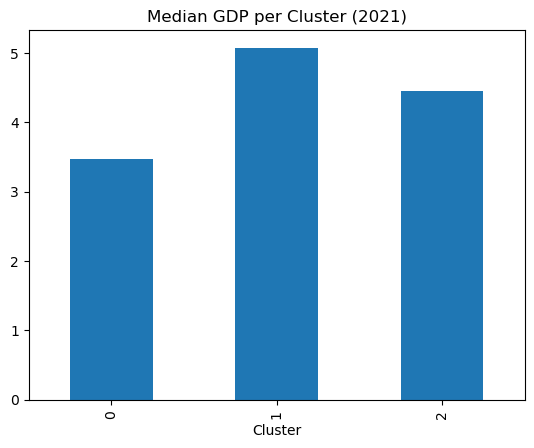

In [9]:
years_df.groupby("Cluster").median()["2021"].plot(kind="bar")
plt.title("Median GDP per Cluster (2021)")
plt.show()

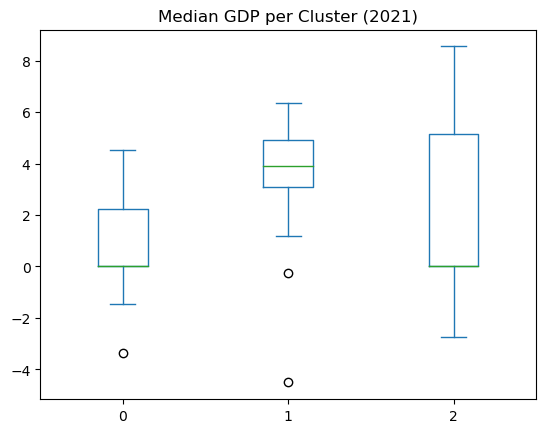

In [10]:
years_df.groupby("Cluster").median().T.plot(kind="box")
plt.title("Median GDP per Cluster (2021)")
plt.show()

# Model Fitting

In [11]:
temp = years_df.drop("Cluster", axis=1)
temp_guyana = temp[temp["Country Name"] == "Guyana"].T.iloc[1:]
temp_guyana.columns = ["GDP"]

In [19]:
temp_guyana = temp_guyana.iloc[:-2]
temp_guyana

,GDP
1961,4.689524
1962,1.104926
1963,-12.278657
1964,11.360282
1965,10.541019
1966,5.233274
1967,4.313622
1968,1.024828
1969,6.994387
1970,4.255457


Average GDP in next 20 years is 3.712483096452886
Predictions for next 20 years are... [3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831
 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831
 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831 3.7124831
 3.7124831]


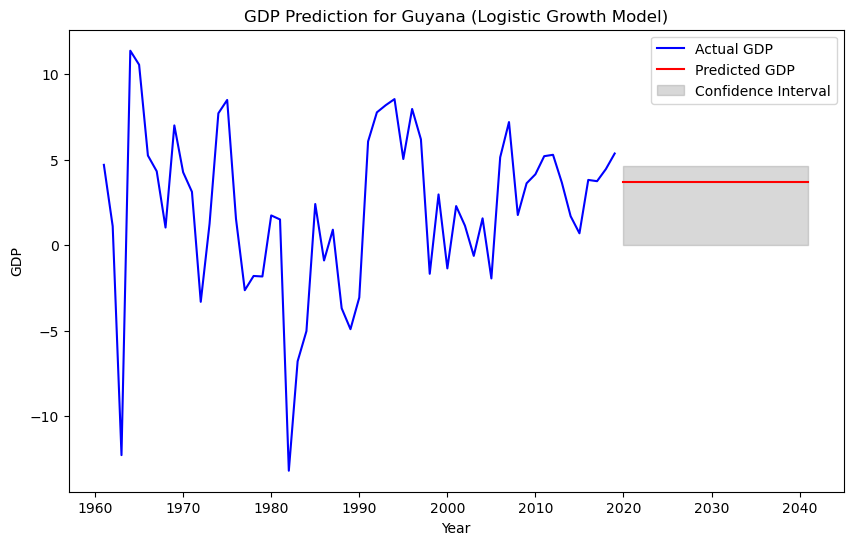

In [18]:
from scipy.optimize import curve_fit
from err_ranges import err_ranges

# Convert the GDP values to numeric
temp_guyana['GDP'] = pd.to_numeric(temp_guyana['GDP'], errors='coerce')

# Define the logistic growth function
def logistic_growth(x, L, k, x0):
    return (L / (1 + np.exp(-k * (x - x0))))

# Prepare the data
x = temp_guyana.index.astype(int)
y = temp_guyana['GDP']

# Define the initial parameter values
L_init = max(y)  # Maximum GDP value
k_init = 1.0  # Initial guess for the growth rate parameter
x0_init = np.median(x)  # Median of the x values

# Perform the curve fitting with the initial parameter estimates
params, params_covariance = curve_fit(logistic_growth, x, y, p0=[L_init, k_init, x0_init], maxfev=10000)

# Generate predictions for the next 20 years
future_x = np.arange(2020, 2042)
predictions = logistic_growth(future_x, *params)

# Calculate the confidence intervals
sigma = np.sqrt(np.diag(params_covariance))
lower, upper = err_ranges(future_x, logistic_growth, params, sigma)

print(f"Average GDP in next 20 years is {np.mean(predictions)}")
print(f"Predictions for next 20 years are... {predictions}")

# Plot the actual data and predictions
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='Actual GDP')
plt.plot(future_x, predictions, 'r-', label='Predicted GDP')
plt.fill_between(future_x, lower, upper, color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Prediction for Guyana (Logistic Growth Model)')
plt.legend()
plt.show()